## Lab 5: Spatial filtering and edge detection

Written by: Enrique Mireles Gutiérrez  
ID Number: 513944  
Bachelor: ITR  
Date: 2019-02-27 

### Introduction

Blurring an image is a useful operation for computer vision. Although it might seem counter intuitive, blurring allows for other operations such as edge detection and contour finding to perform better. This happens because blurring performs an average on the pixels, thus eliminating small variations or noise.

Blurring is a type of spatial filtering. This term refers to an image processing technique which involves changing the value of a pixel depending on the values of neighboring pixels. Most of the times this is done with the help of a kernel and a process known as convolution or correlation. A kernel is a matrix that determines how the neighboring pixels will affect the center pixel. When a kernel is applied to an image, an output image is obtained. The main point is, how are the values of the kernel determined?

There are many different ways of doing such thing. This document focuses on some of them in order to provide an introduction to different blurring techniques. Furthermore, this will allow to determine which algorithms outperform other algorithms in determined conditions. Not all blurring techniques are equal. For instance, some perform better at reducing noise, while others perform better at maintaining edges.

### Objectives

In this lab, you will learn about a fundamental topic in the field of image processing and image enhancement, this is spatial filtering.

### Procedure

This lab report is subdivided in smaller numbered programs shown below.

#### 1. Importing Libraries

The following libraries are used throughout the lab report:
- cv2: OpenCV library used for artificial vision.
- matplotlib: Create plots. Requires images in RGB color space.
- numpy: Library used for matrix operations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### 2. Constant definitions

The following lines define the constants used throughout the lab report:

In [2]:
CABALLO_MOTORIZADO = "../fig/cavalo-motorizado.jpg"
CAT = "../fig/cat.jpg"

#### 3. Useful functions

The following functions are used several times. In order to avoid repetition they are defined here.

In [3]:
def is_grayscale(img):
    """
        Returns true if the image is grayscale (channels == 1).
        Returns false if channels > 1.
    """
    
    # If img.shape has a channel value, read it and determine if
    # it is a grayscale image. If it doesn't have, assume that the
    # image is grayscale.
    if (len(img.shape) == 3):
        return img.shape[2] == 1
    return True

def visualize_image(img, fig_number, fig_title):
    """
        Plot image to a matplotlib figure.
    """
    
    # Select the figure.
    plt.figure(fig_number)
    
    # Determine the channels of the image and plot accodingly.
    if (is_grayscale(img)):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    
    # Set plot labels.
    plt.title(fig_title)
    plt.xlabel('x-resolution')
    plt.ylabel('y-resolution')

def read_image_safe(filename, color, conversion=False):
    """
        Read an image in specified color space.
        If the image cannot be opened then exit the program and alert the user.
        Do a color space conversion if specified by the user.
    """
    
    # Read image and if it fails exit.
    img = cv2.imread(filename, color)
    if img is None:
        print('ERROR: image ', filename, 'could not be read')
        exit()
    
    # Do conversion if requested. Return image.
    if conversion:
        return cv2.cvtColor(img, conversion)
    return img

#### 4. Smoothing spatial filters

The following program performs a convolution and correlation on a 5x5 zero matrix with a 1 in the center of it.

In [4]:
# define function `f`
f = np.zeros((5, 5), np.float32)
f[2, 2] = 1

# define a 3x3 kernel
kernel = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], np.float32)

# compute correlation
correlation = cv2.filter2D(f, -1, kernel)

# re-rotate the kernel `w` by 180 deg using cv2.flip()
kernel_rotated = cv2.flip(kernel, -1)

# conpute convolution
convolution = cv2.filter2D(f, -1, kernel_rotated)

# display correlation values
print('\nCorrelation:\n', correlation)

# display convolution values
print('\nConvolution:\n', convolution)


Correlation:
 [[0. 0. 0. 0. 0.]
 [0. 9. 8. 7. 0.]
 [0. 6. 5. 4. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]

Convolution:
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]


#### 5. Convolve image with kernel

**5.1** Some key functions used in this section are:

- `cv2.flip(src, flipCode[, dst])`
     - Flips a 2D array around vertical, horizontal, or both axes.
     - src – Input array.
     - dst – Output array of the same size and type as src.
     - flipCode – A flag to specify how to flip the array.
         - 0 means flipping around the x-axis and positive value 
         - 1 means flipping around y-axis. 
         - -1 means flipping around both axes..
     - **returns** – Mat object.
- `cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])`
    - Convolves an image with the kernel.
    - src – Input image.
    - dst – Output image.
    - ddepth – Desired depth of the destination image.
    - kernel – Convolution kernel (or rather a correlation kernel).
    - anchor – Anchor of the kernel that indicates the relative position of a filtered point within the kernel.
    - delta – Optional value added to the filtered pixels before storing them in dst.
    - borderType – Pixel extrapolation method (see borderInterpolate() for details).
    - **returns** – Mat object.

Information retrieved from: 
- https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20filter2D(InputArray%20src,%20OutputArray%20dst,%20int%20ddepth,%20InputArray%20kernel,%20Point%20anchor,%20double%20delta,%20int%20borderType)

**5.2** What would be the output image if you convolved the input image with a 1x1 dimension kernel?

- The result is the same image as the input image. The reason behind this is that every pixel is essentially being multiplied by 1 and placed in the same coordinate in the output image; thus, obtaining an equal image.
- An example can be found in the results section of this cell.

**5.3** Explain the output images when running the correlation and convolution steps using a kernel with the following sizes: 13 x 13, 21 x 21, and 31 x 31.

- As the dimension of the matrix increases, the kernel takes more pixels into account when calculating the average for the pixel. Therefore, the averaging effect seems to expand more, producing a more blurred image.
- An example can be found in the results section of this cell.

**5.4** What would be the effect of convolving an input image with the following kernel, which is known as the weighted average filter:

$$ 
K = \frac{1}{16} 
\begin{bmatrix} 
    1 & 2 & 1 \\ 
    2 & 4 & 2 \\ 
    1 & 2 & 1  
\end{bmatrix}
$$

- The effect of the weighted average filter is similar to the averaging filter. The main difference is that when a weighted averaging filter, closer neighboring pixels have a bigger impact in the average than pixels farther apart. With a 3x3 kernel, the effect is quite subtle. Nonetheless, the blur is visible. With a bigger kernel, such as 5x5, the effect will be more visible.

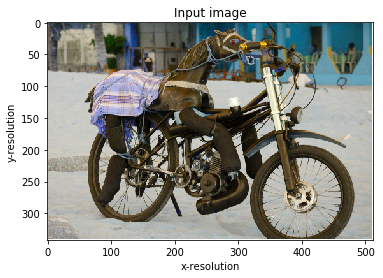

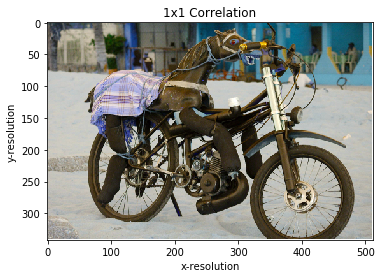

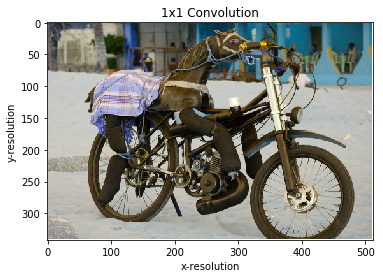

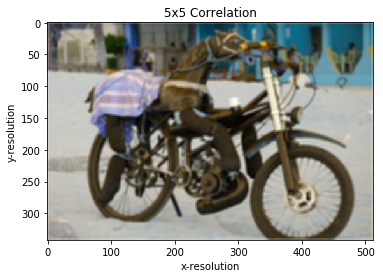

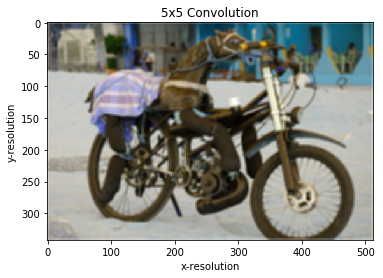

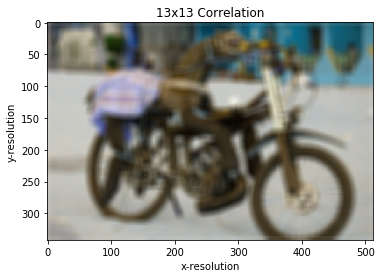

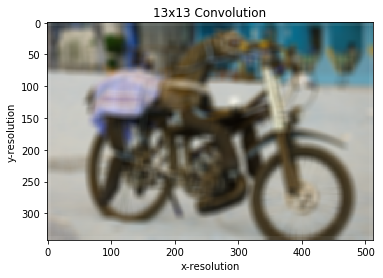

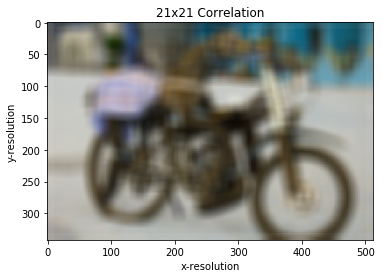

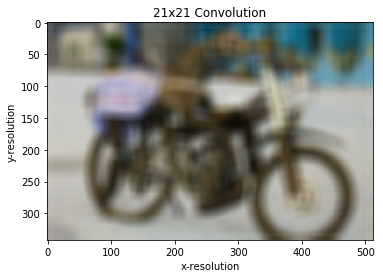

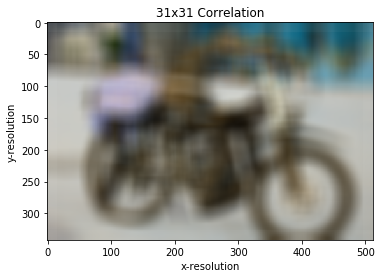

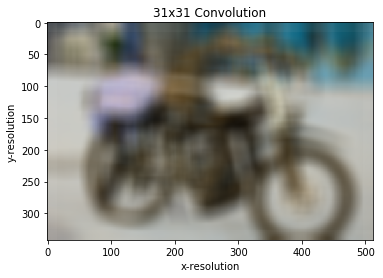

In [5]:
"""
    The program generates different average filters 
    of size n x n and applies the convolution and correlation 
    to an input image.
"""

# Read input image in color space safely.
img = read_image_safe(CABALLO_MOTORIZADO, cv2.IMREAD_COLOR)

# Define the dimension (nxn) of average filter kernels.
sizes = [1, 5, 13, 21, 31]

# Show original image.
visualize_image(img, 1, "Input image")

# Iterate through every size.
for i, dim in enumerate(sizes):
    
    # Generate the corresponding average filter for the specified size.
    kernel = np.ones((dim, dim), np.float32) / dim ** 2
    
    # Compute the correlation and convolution with the filter.
    correlation = cv2.filter2D(img, -1, kernel)
    convolution = cv2.filter2D(img, -1, cv2.flip(kernel, -1))
    
    # Display results.
    visualize_image(correlation, 2+i*2, '%dx%d Correlation' % (dim, dim))
    visualize_image(convolution, 3+i*2, '%dx%d Convolution' % (dim, dim))

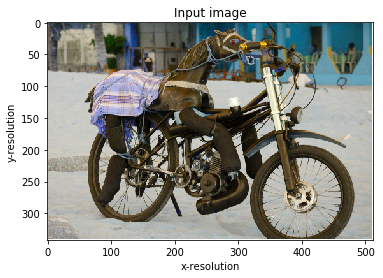

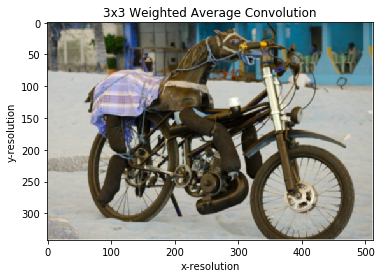

In [6]:
"""
    This program uses a predefined weighted average filter
    and calculates the convolution with the input image.
"""

# Read input image in color space safely.
img = read_image_safe(CABALLO_MOTORIZADO, cv2.IMREAD_COLOR)

# Define the proposed weighted average filter.
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]], np.float32) / 16

# Compute the convolution with the filter.
convolution = cv2.filter2D(img, -1, kernel)

# Display results.
visualize_image(img, 1, "Input image")
visualize_image(convolution, 2, '3x3 Weighted Average Convolution')

#### 6. Blur

**6.1** Some key functions used in this section are:

- `cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) `
     - Blurs an image using the normalized box filter.
    - src – Input image.
    - dst – Output image.
    - ksize – Blurring kernel size.
    - anchor – Anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
    - borderType – Border mode used to extrapolate pixels outside of the image.
     - **returns** – Mat object.
     
Information retrieved from:
- https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20blur(InputArray%20src,%20OutputArray%20dst,%20Size%20ksize,%20Point%20anchor,%20int%20borderType)

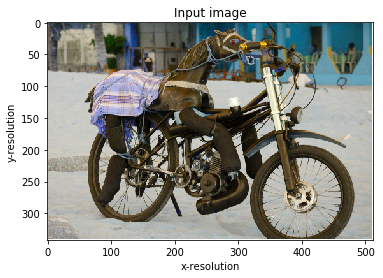

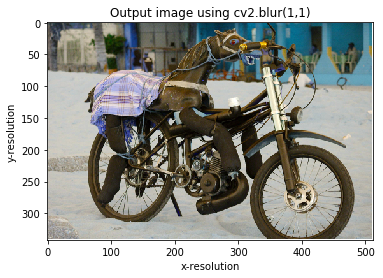

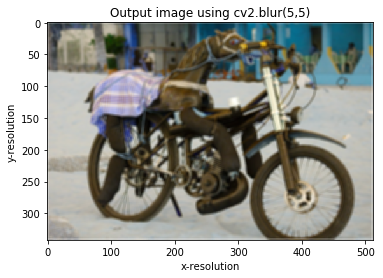

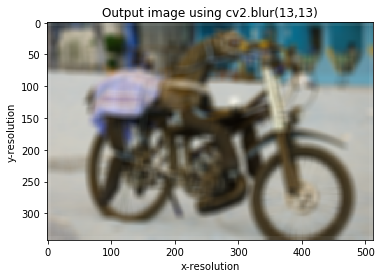

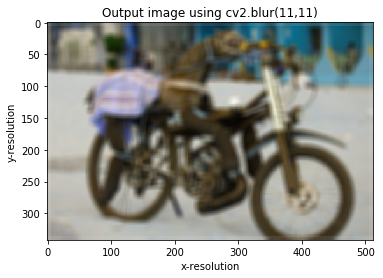

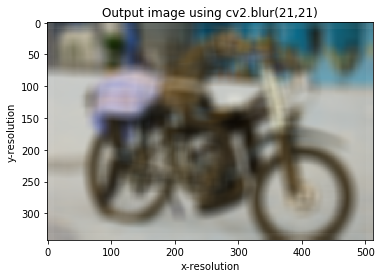

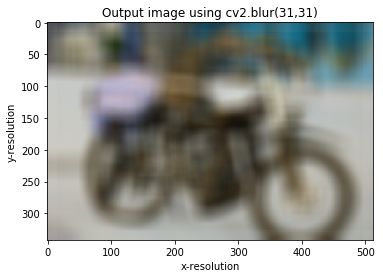

In [7]:
"""
    The following code performs a blur operation on the input image.
    The dimensions of the blur kernel are varied as shown.
"""

# Read input image in color space safely.
img = read_image_safe(CABALLO_MOTORIZADO, cv2.IMREAD_COLOR)

# Define the dimensions at which the blur filter will be applied.
sizes = [1, 5, 13, 11, 21, 31]

# Display input image.
visualize_image(img, 1, "Input image")

# Iterate through all possible sizes
for i, dim in enumerate(sizes):
    
    # Blur image.
    kernel_size = (dim, dim)
    blurred_image = cv2.blur(img, kernel_size)
    
    # Display image.
    visualize_image(blurred_image, 2+i, 'Output image using cv2.blur(%i,%i)' % (kernel_size[0], kernel_size[1]))

#### 7. Gaussian Blur

**7.1** Some key functions used in this section are:

- `cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])`
    - Blurs an image using a Gaussian filter.
    - src – Input image.
    - dst – Output image.
    - ksize – Gaussian kernel size.
    - sigmaX – Gaussian kernel standard deviation in X direction.
    - sigmaY – Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height , respectively.
    - borderType – pixel extrapolation method (see borderInterpolate() for details).
     - **returns** – Mat object.
     
Information retrieved from:

- https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20GaussianBlur(InputArray%20src,%20OutputArray%20dst,%20Size%20ksize,%20double%20sigmaX,%20double%20sigmaY,%20int%20borderType)

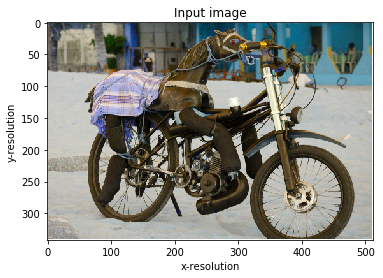

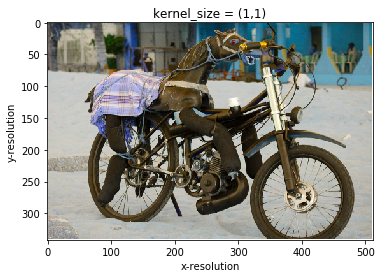

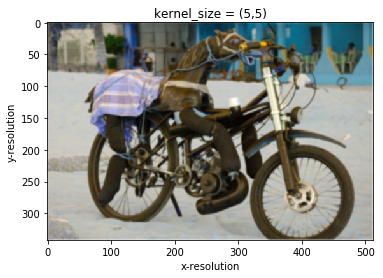

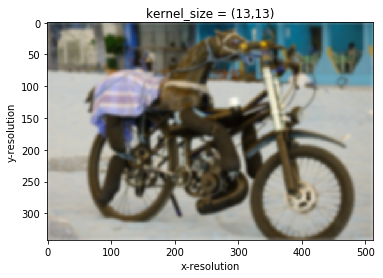

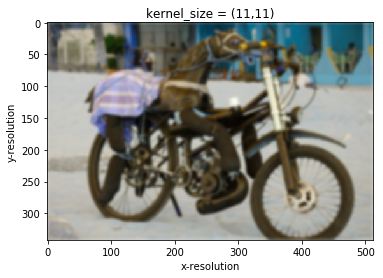

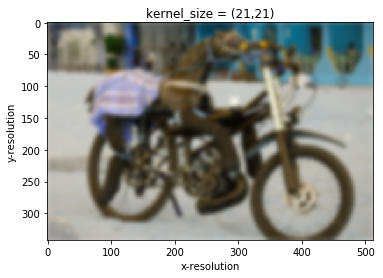

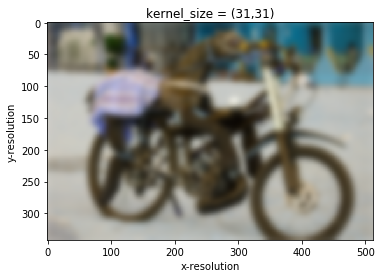

In [8]:
"""
    The following code performs a gaussian blur operation on 
    the input image. The dimensions of the gaussian blur kernel 
    are varied as shown.
"""

# Read input image in color space safely.
img = read_image_safe(CABALLO_MOTORIZADO, cv2.IMREAD_COLOR)

# Define the dimensions at which the blur filter will be applied.
sizes = [1, 5, 13, 11, 21, 31]

# Display input image.
visualize_image(img, 1, "Input image")

# Iterate through all possible sizes
for i, dim in enumerate(sizes):
    
    # Apply gaussian blur filter to the input image.
    kernel_size = (dim, dim)
    blurred_image = cv2.GaussianBlur(img, kernel_size, 0)
    
    # Display image.
    visualize_image(blurred_image, 2+i, 'kernel_size = (%i,%i)' % (kernel_size[0], kernel_size[1]))

#### 8. Median Blur

The following program applies noise to the image, then it performs a median blur on it in order to remove the noise.

The program also allows the user to vary the Salt/Pepper ratio, the amount of it and the aperture linear size of the median blur filter. This filter uses a ksize x ksize aperture to smooth the image.

As the ksize increases, the amount of detail in the image decreases. Since the aperture has a larger size, the filter smooths more the image. At ksize = 21, not a lot of detail remains in the image. Nonetheless, border analysis can still be performed and used to detect things such as the wheels.

As the amount of noise increases, it becomes more difficult to remove the noise from the image. Some of it makes it through the filter and still appears in the output image. Therefore, a higher number for ksize is needed to completely remove the noise.

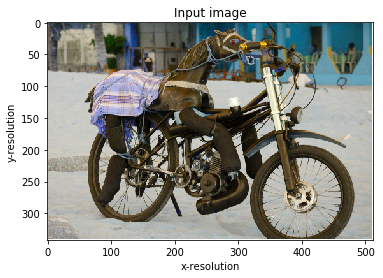

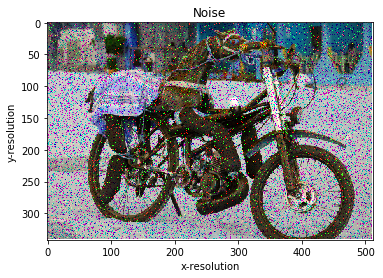

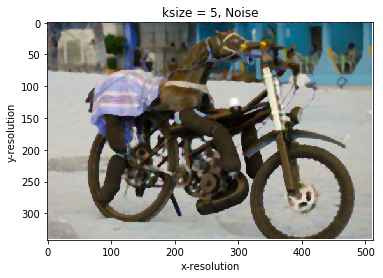

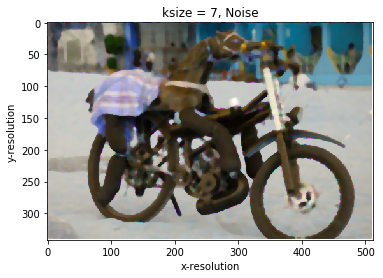

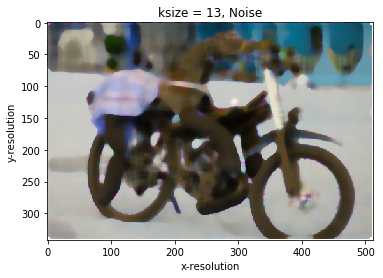

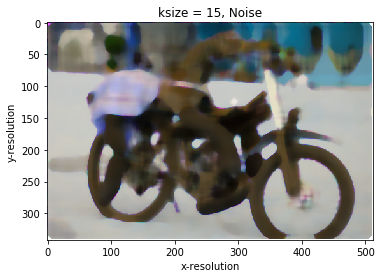

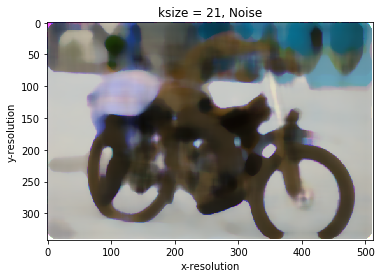

In [9]:
# Read input image in color space safely.
img = read_image_safe(CABALLO_MOTORIZADO, cv2.IMREAD_COLOR)

# define level of salt & pepper noise
s_vs_p = 0.2
amount = 0.1

# create a copy of input image
out = img.copy()

# Generate Salt '1' noise
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
out[tuple(coords)] = 255

# Generate Pepper '0' noise
num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
out[tuple(coords)] = 0

# Display input image and image after the noise is applied to it.
visualize_image(img, 1, "Input image")
visualize_image(out, 2, "Noise")

# Perform a median blur varying the kszie in the specified steps.
for i, ksize in enumerate([5, 7, 13, 15, 21]):
    img_median = cv2.medianBlur(out, ksize)
    visualize_image(img_median, 3+i, "ksize = %d, Noise" % (ksize))


#### 9. Bilateral Filter

The main advantage of a bilateral filter is that it preserves edges sharp while removing images. Nonetheless, the execution time of the algorithm is slower than its counterparts. This type of filter is similar to the Gaussian filter, in the way that it considers nearby pixels. However, a Gaussian filter doesn’t consider the intensity of the pixels. In other words, it doesn’t consider if the pixels are part of an edge or not, thus blurring the whole image.

A bilateral filter makes sure that only pixels with similar intensity are considered for blurring. Therefore, it preserves the edges since pixels at those regions have high intensity values.

**9.1** Some key functions used in this section are:

- `cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]`
    - Applies the bilateral filter to an image.
    - src – Input image.
    - dst – Output image.
    - d – Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
    - sigmaColor – Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood will be mixed together, resulting in larger areas of semi-equal color.
    - sigmaSpace – Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough. When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
     - **returns** – Mat object.
     
Information retrieved from:

- https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20GaussianBlur(InputArray%20src,%20OutputArray%20dst,%20Size%20ksize,%20double%20sigmaX,%20double%20sigmaY,%20int%20borderType)

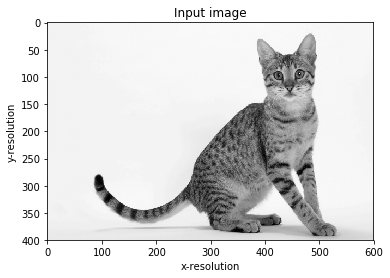

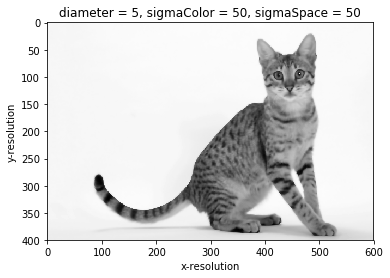

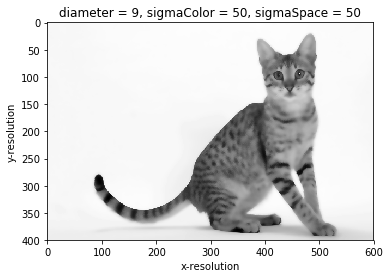

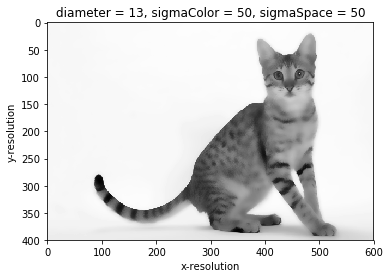

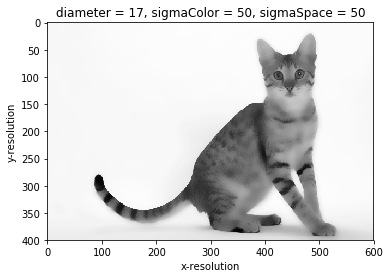

In [10]:
"""
    This program performs a bilateral filter on an image.
"""

# Read input image in color space safely.
img = read_image_safe(CAT, cv2.IMREAD_COLOR, cv2.COLOR_BGR2GRAY)

# Display input image.
visualize_image(img, 1, "Input image")

# Do a bilateralFilter and vary the diameter parameter.
for i, diameter in enumerate([5, 9, 13, 17]):
    
    # Execute the bilateral filter.
    sigma_color = 50
    sigma_space = 50
    img_bilateralfilter = cv2.bilateralFilter(img, diameter, sigma_color, sigma_space)
    
    # Display result.
    visualize_image(img_bilateralfilter, 2+i, "diameter = %d, sigmaColor = %d, sigmaSpace = %d" % (diameter, sigma_color, sigma_space))


### Conclusion

The key fundamentals of spatial filtering rely on convolution and correlation. This two terms are closely related, since a convolution is just a correlation that has a kernel rotated 180°. A kernel is used to perform different spatial filtering algorithms, and is constructed by a n x n matrix, where n must be an odd number. The kernel is then applied through every pixel and results in an output image.

The values inside of the kernel, produce different outputs. Therefore, its important to understand how the values are calculated. One of the most basic ways to fill a kernel is to make an averaging filter. This filter simply takes the n x n neighboring pixels and averages their value. This results in a blurred image. This effect can be then performed by calling `cv2.blur` instead of creating the kernel every time. An alternative to the blur filter is the Gaussian blur filter, which uses the Gaussian distribution to construct the kernel values. The Gaussian blur filter takes more into account neighboring pixels than farther apart pixels, thus producing a more natural blur.

The main disadvantage of an averaging filter and the Gaussian filter is that they don’t preserve edges. When such effect is desired, one can use a median blur or a bilateral filter. The median blur excels at removing small particles of noise (often called Salt & Pepper) while still maintaining edge detail. Nonetheless, it still has its limitations. A more complex approach would be a bilateral filter. This filter, performs similarly to the median blur and the Gaussian blur, in such way that edges are preserved, but the images becomes smoother. This is possible since a bilateral filter determines if pixels are part of an edge in order to preserve them.

All in all, there are many techniques for removing noise and smoothing images. The key point is to be able to determine which is the best algorithm for the desired application. Also, its important to remember that behind the functions found in cv2 for bluring images, a convolution and a kernel lay behind.

### References

1. OpenCV. (n/a). _Smoothing Images_. Retrieved from: https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
2. University of Edinburgh. (n/a). _Bilateral Filtering for Gray and Color Images_. Retrieved from: http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html

_I hereby affirm that I have done this activity with academic integrity._